In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from catboost import CatBoostClassifier
import os

In [2]:
data = pd.read_csv('idk_counter_of_data.csv')

In [26]:
data

,user_id,post_id,target,age,country,city,user_like_rate,text,topic,post_like_rate
0,115794,4256,0,28,0.127022,0.078181,0.071429,0.000136,0.139026,0.133492
1,72228,4256,0,21,0.127022,0.149263,0.098684,0.000136,0.139026,0.133492
2,162181,4256,0,17,0.127022,0.082398,0.041958,0.000136,0.139026,0.133492
3,78823,4256,0,24,0.204443,0.252788,0.149254,0.000136,0.139026,0.133492
4,71972,4256,0,39,0.127022,0.161932,0.092838,0.000136,0.139026,0.133492
...,...,...,...,...,...,...,...,...,...,...
9536580,93489,5970,0,21,0.127022,0.148571,0.103448,0.000211,0.139026,0.134073
9536581,149822,5970,0,37,0.127022,0.042586,0.027027,0.000211,0.139026,0.134073
9536582,111281,5970,0,17,0.127022,0.078072,0.100529,0.000211,0.139026,0.134073
9536583,89463,5970,0,19,0.127022,0.161932,0.141414,0.000211,0.139026,0.134073


In [7]:
data['target'].value_counts()

0    8039355
1    1497230
Name: target, dtype: int64

In [10]:
X = data.drop('target', axis=1)
y = data['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [6]:
model = CatBoostClassifier(early_stopping_rounds=15, learning_rate=0.5, iterations=200, random_state=1)

In [7]:
params = {
'depth': [4, 6, 8, 10, 12, 14],
'l2_leaf_reg': [0.01, 0.03, 0.05, 0.1, 0.2, 0.5]
}

In [8]:
grid_seacrh_model = model.grid_search(params, X=X_train, y=y_train, cv=3)

0:	learn: 0.4669531	test: 0.4669279	best: 0.4669279 (0)	total: 573ms	remaining: 1m 54s
1:	learn: 0.4245937	test: 0.4243570	best: 0.4243570 (1)	total: 932ms	remaining: 1m 32s
2:	learn: 0.4148834	test: 0.4146828	best: 0.4146828 (2)	total: 1.26s	remaining: 1m 22s
3:	learn: 0.4122645	test: 0.4120540	best: 0.4120540 (3)	total: 1.64s	remaining: 1m 20s
4:	learn: 0.4116498	test: 0.4114322	best: 0.4114322 (4)	total: 1.99s	remaining: 1m 17s
5:	learn: 0.4112528	test: 0.4109939	best: 0.4109939 (5)	total: 2.33s	remaining: 1m 15s
6:	learn: 0.4110790	test: 0.4108550	best: 0.4108550 (6)	total: 2.67s	remaining: 1m 13s
7:	learn: 0.4110436	test: 0.4108061	best: 0.4108061 (7)	total: 2.99s	remaining: 1m 11s
8:	learn: 0.4109823	test: 0.4107475	best: 0.4107475 (8)	total: 3.36s	remaining: 1m 11s
9:	learn: 0.4109060	test: 0.4106752	best: 0.4106752 (9)	total: 3.68s	remaining: 1m 9s
10:	learn: 0.4109072	test: 0.4106665	best: 0.4106665 (10)	total: 3.99s	remaining: 1m 8s
11:	learn: 0.4107929	test: 0.4105894	best: 

In [20]:
balanced_model = CatBoostClassifier(auto_class_weights='Balanced', depth=6, l2_leaf_reg=0.2, early_stopping_rounds=15, learning_rate=0.5, iterations=2000, random_state=1)

In [21]:
balanced_model.fit(X_train, y_train)

0:	learn: 0.6562577	total: 565ms	remaining: 18m 50s
1:	learn: 0.6476475	total: 1.1s	remaining: 18m 23s
2:	learn: 0.6453523	total: 1.6s	remaining: 17m 44s
3:	learn: 0.6445393	total: 2.07s	remaining: 17m 15s
4:	learn: 0.6442354	total: 2.54s	remaining: 16m 55s
5:	learn: 0.6440448	total: 3s	remaining: 16m 37s
6:	learn: 0.6437445	total: 3.5s	remaining: 16m 37s
7:	learn: 0.6436542	total: 4.01s	remaining: 16m 39s
8:	learn: 0.6436144	total: 4.58s	remaining: 16m 52s
9:	learn: 0.6435142	total: 5.03s	remaining: 16m 40s
10:	learn: 0.6433657	total: 5.58s	remaining: 16m 48s
11:	learn: 0.6433290	total: 6.06s	remaining: 16m 44s
12:	learn: 0.6432511	total: 6.52s	remaining: 16m 36s
13:	learn: 0.6432044	total: 7.04s	remaining: 16m 39s
14:	learn: 0.6431832	total: 7.52s	remaining: 16m 35s
15:	learn: 0.6430899	total: 8s	remaining: 16m 31s
16:	learn: 0.6430604	total: 8.54s	remaining: 16m 35s
17:	learn: 0.6430208	total: 9.13s	remaining: 16m 45s
18:	learn: 0.6430139	total: 9.66s	remaining: 16m 47s
19:	learn: 0

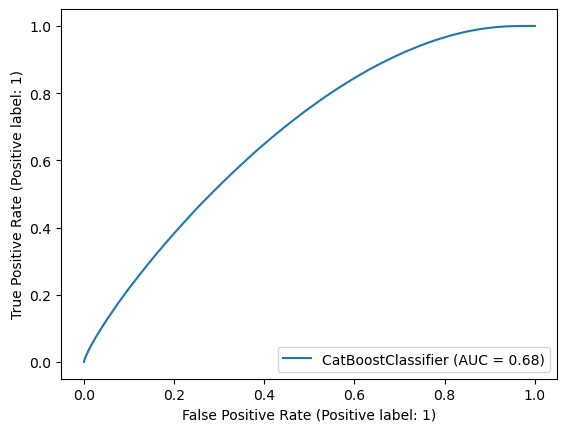

In [22]:
RocCurveDisplay.from_estimator(balanced_model, X_train, y_train)

In [23]:
from sklearn.metrics import PrecisionRecallDisplay

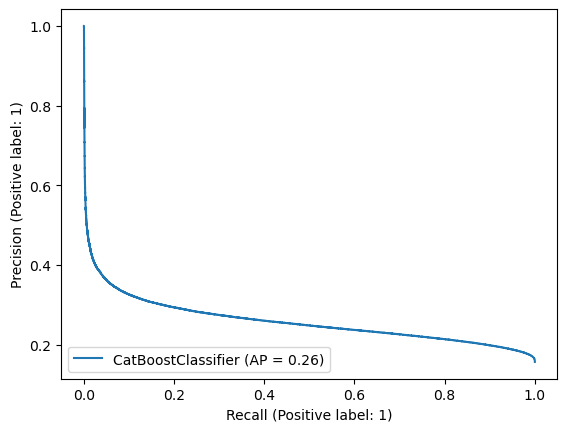

In [25]:
PrecisionRecallDisplay.from_estimator(balanced_model, X_train, y_train)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, balanced_model.predict(X_test))

0.5421652509782066

In [30]:
accuracy_score(y_train, balanced_model.predict(X_train))

0.5492550530404752

In [34]:
balanced_model.save_model('balanced_model',
                           format="cbm")